# Sieci neuronowe komórkowe (Cellular Neural Networks, AKA CNN)
## Pierwsze kolokwium za dwa tygodnie
### Zastosowania:
* Advanced pattern recognition
* Wydobywanie cech z obrazów
    * Zdjęcie rzeki czy portu morskiego; ekstrakcja obiektów poruszających się z wybraną prędkością w wybranym kierunku
* Analiza tekstur, wyłapywanie błędów (tekstylia, ale możnaby i grafen?)
* Modelowanie zjawisk fizycznch
    * str. meandrowe na cylindrycznych domenach
    * pattern formation
    * **modelowanie epidemii**
* Inteligentne systemy bezpieczeństwa

Sąsiedztwo pierwszego rzędu (r = 1) (o - sąsiad, x - inny neuron poza sąsiedztwem)
```
xxxxx
xooox
xoOox
xooox
xxxxx
```

Sąsiedztwo trzeciego rzędu (r = 3)
```
xxxxxxxxxxx
xxoooooooxx
xxoooooooxx
xxoooooooxx
xxoooXoooxx
xxoooooooxx
xxoooooooxx
xxoooooooxx
xxxxxxxxxxx
```
Tworząc sieć (ucząc ją) specyfikujemy:
* A - macierz sygnału wejściowych
* B - macierz sygnałów wyjściowych
* I - macierz polaryzacji zewnętrznych

Razem tworzą **szablon** sieci komórkowej (stencil. Chyba tak jak w równaniach różniczkowych i CUDA)

```
Przykład:
o o o o o
 \|
o-o o o o    (sąsiedztwo [1,1]
   \
o o o o o     
     \|
o o o-o o    (ten sam stencil na [3,3])
       \
o o o o o

```
Macierze przedstawiamy oczywiście tak:
```
c11 c12 ...
c21 c22 ..
...
```
Aktualizacja pola lokalnego $x$:
$$x_{ij}[(n+1)\Delta t] = x_{ij} (n \Delta t) + \sum_{k=-r}^{r} \sum_{l=-r}^{r} \big( A_{i+k, j+l} y_{i+k, j+l} (n \Delta t) + B_{i+k, j+l} u_{i+k, j+l} (n \Delta t) \big) + I_{ij}$$
Nie jestem pewien ostatniej linijki, ale wydaje mi się że jest ok. Mogło tam być I lub l, stałe na całą symulację lub zależne od indeksu. Ale tu już nie jestem pewien

Aktualizacja stanu neuronu, czyli jak nic nie powiedzieć a pisać:
$$y_{ij} (n \Delta t) = f(x_{ij} (n \Delta t)$$


<img src="16-04-14-ssn-r-1.jpg">


Sieć neuronowa ze sprzężeniem zwrotnym!

Poniższy zestaw śledzi układ 8 ciał i wykrywa ruch w prawo.
```
Przykład (na moje implementacyjne potrzeby)
A
-0.1 -0.1 -0.1
-0.1 0   -0.1
-0.1 -0.1 -0.1

B
0 0   0
0 1.5 0
0 0   0

I = -2

A^tau
0 0 0
0 0 0
0 0 0

B^tau
0   0 0
1.5 0 0
0   0 0
```

### Przykładowe zadania sieci komórkowej
* Detekcja ruchu na serii obrazków (może być feed z kamery)
* Detekcja linii poziomych, pionowych...
* Detekcja obszarów o minimalnym gradiencie poziomu szarości -> komórki rakowe

# Tekstury
**TeXel** - podstawowy kształt w teksturze. Nie powtarza się periodycznie, ale... jakoś się powtarza. Np. kafelek w podłodze.

Był sobie gość, co się nazywał Brodatz. Opracował jakies miliardy tekstur wziętych z natury. Teraz są wykorzystywane w kodzie. Prawdopodobnie ma więcej cytowań niż Ty.

CNN mogą rozpoznawać tekstury, co pozwala np. na wykrywanie pożarów na sawannie albo oderwań gór lodowych.

Przykładowe pytanie na kol.: Zastosowania sieci komórkowych w przemyśle. Wymienić kilka, opisać.

Zestaw do detekcji linii pionowych z $r=2$
```
A
0 0 1 0 0
0 0 0.5 0 0
0 0 2 0 0
0 0 1.5 0 0
0 0 2 0 0

B
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
```


Wykrywanie naroży, np.
```
naroża jako o

xo  x  ox
 x  x  x
 oxxxxxo     #środek nie jest narożem ale skrzyżowaniem
    x
```


### Symulacja powstawania kryształów
> Increase feedback till $f_0$ becomes unstable, $a_{0,0} = -21.9$

### Symulacja Biełusowa-Żabotyńskiego

I w tym momencie jestem pewien że CNN to jest ugloryfikowany schemat rozwiązywania równań różniczkowych cząstkowych na siatce przez różnice skończone. Wiem, bo pisałem coś takiego.
<a href="http://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/master/lessons/04_spreadout/04_06_Reaction_Diffusion.ipynb">Behold!</a>

### Pomysł implementacji dla przypadku 1d?
<img src="16-04-14-ssn-r-2.jpg">

# Badania własne :D

<a href="https://en.wikipedia.org/wiki/Cellular_neural_network">Za wikipedią</a>:
>In computer science and machine learning, cellular neural networks (CNN) (or cellular nonlinear networks (CNN)) are a parallel computing paradigm similar to neural networks, with the difference that communication is allowed between neighbouring units only. Typical applications include image processing, analyzing 3D surfaces, solving partial differential equations, reducing non-visual problems to geometric maps, modelling biological vision and other sensory-motor organs.

* Więc mówimy tutaj właściwie o paradygmacie programowania równoległego, co jest oczywiście dla wszystkich jasne i nie trzeba było o tym wspominać na wykładzie.
* One mogą liczyć równania różniczkowe. To by pasowało do *numerical-mooc*.


### Jak to zrobić w CUDA?
### Jak robi to Jakdojade

/home/dominik/.anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


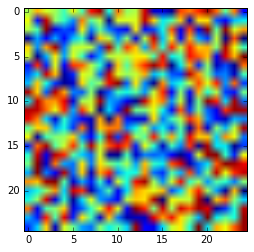

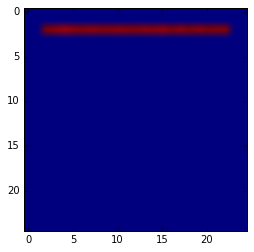

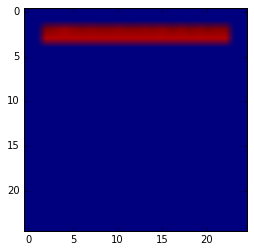

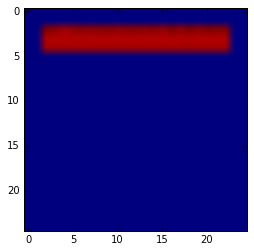

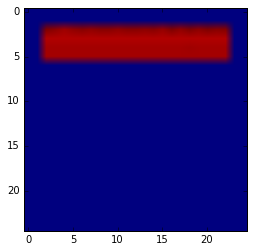

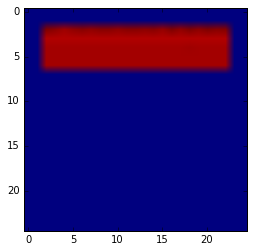

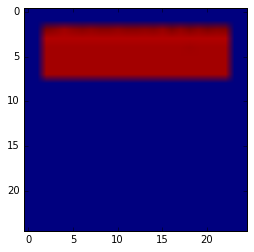

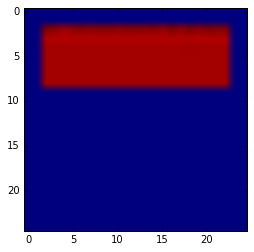

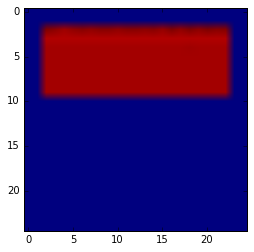

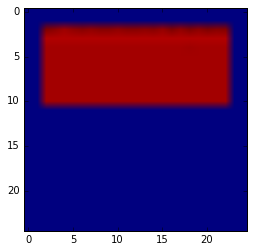

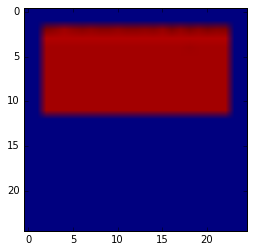

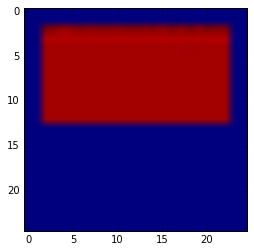

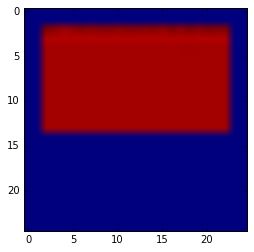

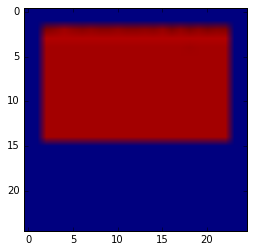

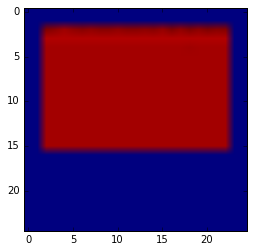

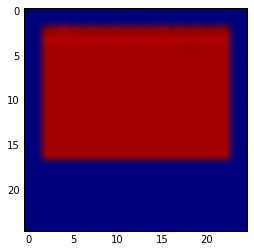

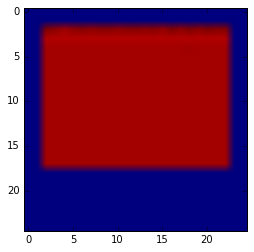

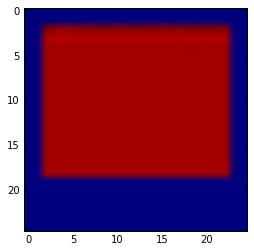

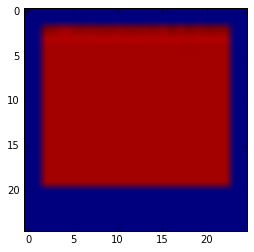

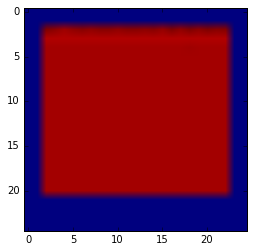

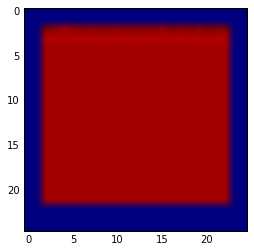

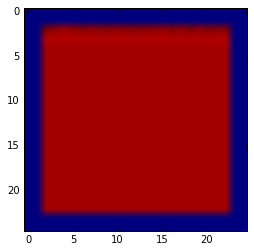

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
r=2
A = np.array([[0,0,1,0,0],
              [0,0,0.5,0,0],
              [0,0,2,0,0],
              [0,0,1.5,0,0],
              [0,0,2,0,0]])
B = np.array([[0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0],
              [0,0,1,0,0]])

y = np.random.random((25, 25))
x = np.zeros_like(y)
y_0 = y.copy()
u = np.ones_like(y)
I = np.ones_like(y)
fig, axes = plt.subplots()
axes.imshow(y_0)

def f(x):
    return np.arctan(x)*2/np.pi
for iteracja in range(1):
    for i in range(2, 23):
        for j in range(2, 23):
            x[i,j] += np.sum(A*y[i-r:i+r+1, j-r:j+r+1] +
                             B * u[i-r:i+r+1, j-r:j+r+1]) + I[i,j]
        y = f(x)
        fig2, axes2 = plt.subplots()
        axes2.imshow(y)

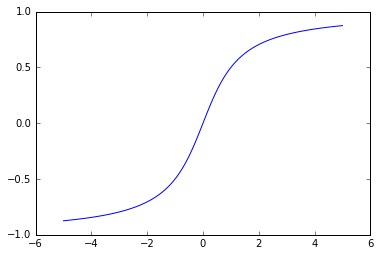

In [17]:
x = np.linspace(-5,5,100)
plt.plot(x,np.arctan(x)*2/np.pi)